# BANK CUSTOMER CHURN PREDICTION

**What is Customer Churn?**

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

The main objective of the Bank Customer Churn Prediction project is to analyze the demographics and financial information of bank customers, including factors like age, gender, credit score, country, balance, and more, in order to predict whether a customer will leave the bank or not. Customer churn, the decision of customers to leave a bank, can significantly impact the bank's business and profitability. By accurately predicting customer churn, the bank can take proactive measures to retain valuable customers and enhance customer satisfaction.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.





**About the Dataset**

The dataset used in this project is sourced from Kaggle and comprises 10,000 rows and 14 columns. The dataset's primary objective is to predict whether a customer will churn (leave the bank) based on their demographics and financial information.

The dataset contains several independent variables, which are potential factors that may influence a customer's decision to leave the bank. These variables include customer-specific information like credit score, country (geography), age, tenure (number of years with the bank), bank balance, the number of bank products utilized (NumOfProducts), whether the customer holds a credit card (HasCrCard), and whether the customer is an active member with the bank (IsActiveMember). The target variable, also known as the dependent variable, is labeled "Exited" and is represented by a binary flag: 1 if the customer closed their account with the bank and 0 if the customer is retained.

**Data Dictionary**

This project aims to build a predictive model that can accurately identify customers likely to churn, enabling the bank to implement targeted retention strategies and ultimately improve customer loyalty and business performance.


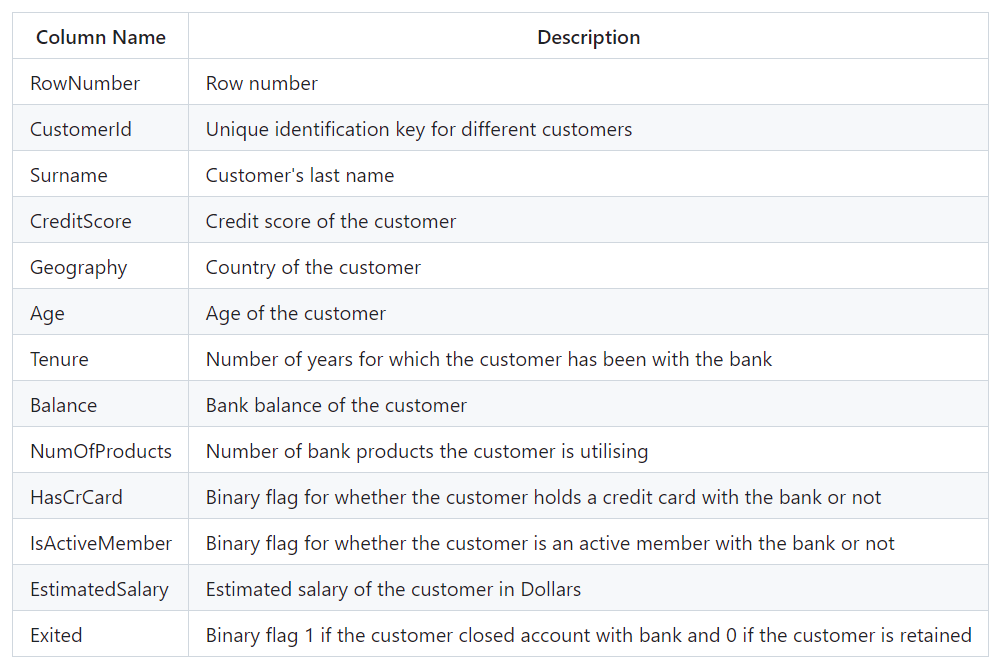

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset

df = pd.read_csv('churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.sample(10000)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3429,3430,15674678,Bradley,731,Germany,Female,43,9,79120.27,1,0,0,548.52,1
262,263,15686776,Rossi,557,France,Female,32,6,184686.41,2,1,0,14956.44,0
3817,3818,15724251,Todd,682,Germany,Female,29,6,101012.77,1,0,0,32589.89,1
2457,2458,15641629,P'eng,537,Spain,Female,38,1,0.00,2,0,1,41233.97,0
9577,9578,15807120,Oluchukwu,841,Germany,Female,52,3,112383.03,1,1,0,85516.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,3273,15793890,Harriman,728,France,Female,59,4,0.00,1,1,1,163365.85,1
9065,9066,15693637,Ochoa,556,France,Female,30,7,0.00,2,1,1,186648.19,0
6570,6571,15790958,Sanders,685,Spain,Male,38,4,0.00,2,1,1,35884.91,0
7202,7203,15671014,Zhdanova,573,Spain,Female,72,8,98765.84,1,1,1,96015.53,0


In [4]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.head(50)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
print(df.to_string()) 

      RowNumber  CustomerId                  Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0             1    15634602                 Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1             2    15647311                     Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2             3    15619304                     Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3             4    15701354                     Boni          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4             5    15737888                 Mitchell          850     Spain  Female   43       2  125510.82              1   

**Data Preprocessing**

In [8]:
df.shape

(10000, 14)

In [9]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
#dropping unnecessary columns- RowNumber; CustomerId; Surname

df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#check null values

df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
#check duplicate values

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [18]:
df.duplicated().sum()

0

In [19]:
#rename column 'Exited' to 'Churn'

df.rename(columns={'Exited':'Churn'},inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#descriptive statistics

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**EDA**

In EDA, we'll be looking at the distribution of data relationship/correlation between the features & target variable.

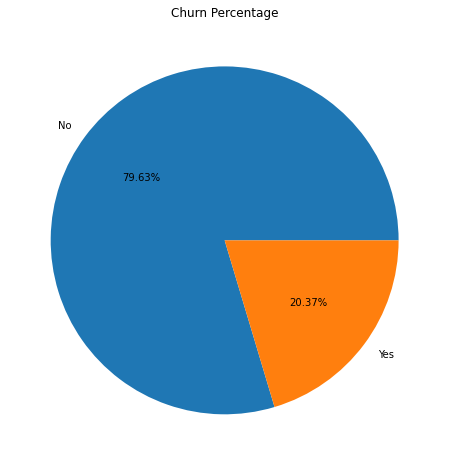

In [22]:
#pie chart

plt.figure(figsize=(10,8))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

This indicates that the majority of the customers use the services of the bank whereas 20.4% of the customers are churning.

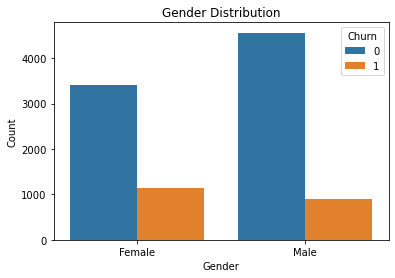

In [23]:
#Gender

sns.countplot(x='Gender', data=df, hue='Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

This indicates that majority are males but females have more tendency to churn as compared to males. As there is not much difference between the churn count of males & females, so we can't have a hypothesis regarding the customer churn based on the gender of the customer.

<AxesSubplot:xlabel='Age', ylabel='Count'>

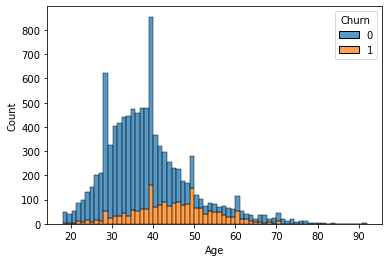

In [24]:
#Age Distribution

sns.histplot(data=df, x='Age', hue='Churn', multiple='stack')

This indicates the age distribution and the churn count of the customers. We observed that majority of customers are from age group 30-40 years old. But the customer churn rate is highest in age group 40-50 years old whereas lowest in age group 20-25 years old.

<AxesSubplot:xlabel='Churn', ylabel='CreditScore'>

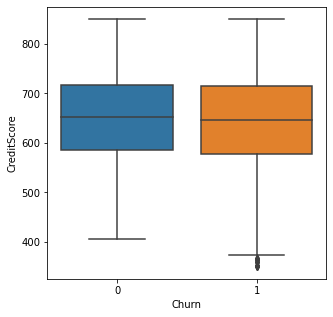

In [25]:
#Credit Score

fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(x='Churn', y='CreditScore', data=df)

This indicates the distribution of customer's credit score alongwith their churn. Here, the median of both the churn & the non-churn customers are same. So, the credit score is not a good indicator of churn. 

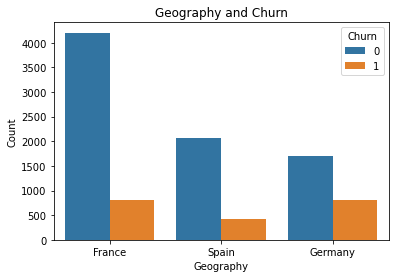

In [26]:
#Customer Location

sns.countplot(x='Geography', hue='Churn', data=df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

This indicates the number of customers from their countries alongwith their churn count. Majority of the customers are from France, followed by Spain and Germany. Whereas Germany has the highest churn rate followed by France and Spain.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

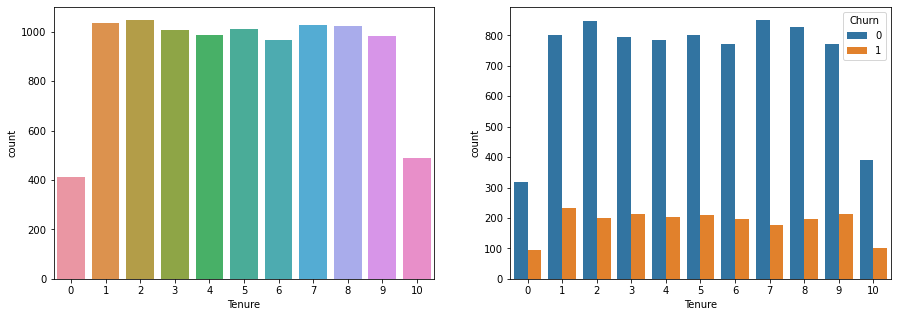

In [27]:
#Tenure

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df, ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df, ax=ax[1])

Tenure refers to time in years that a customer has been a client of the bank. Majority of the customers have a tenure between 1-9 years whereas there are very few customers with a tenure of less than 1 year or more than 9 years. This indicates that the customers with tenure 1-9 years have higher churn count as compared to the customers with more than 9 years with least churn count. This is because the customers with higher tenure are more loyal to the bank are less likely to churn. 

<AxesSubplot:xlabel='Balance', ylabel='Count'>

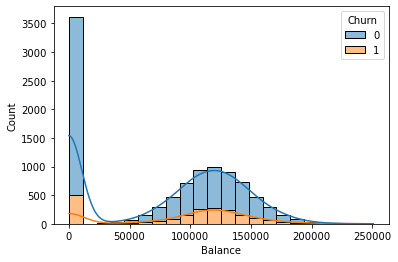

In [28]:
#Bank Balance

sns.histplot(data=df, x='Balance', hue='Churn', multiple='stack', kde = True)

This indicates that huge number of customers have zero bank balance which results in increase churn rate, followed by the customers having bank balance between 100000 - 150000 are more likely to leave the bank.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

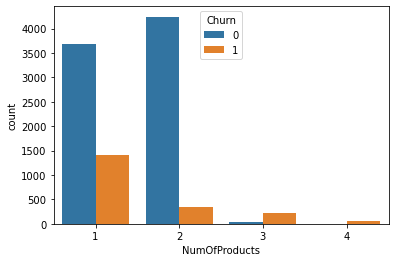

In [29]:
#Number of products purchased

sns.countplot(x='NumOfProducts', hue='Churn', data=df)

This indicates the customers in four categories according to the number of products purchased. The customers with products 1 or 2 are highest in number with low churn count in comparison to the non-churn customers in category. However, the customers with products 3 or 4 have high churn rate. So, the number of products purchased is a good indicator of customer churn.

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

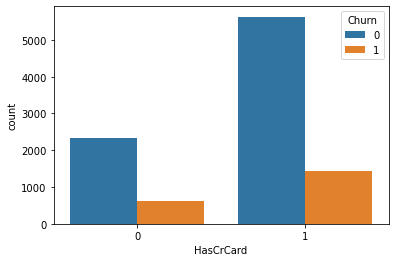

In [30]:
#Customers with/without credit card

sns.countplot(x=df['HasCrCard'], hue=df['Churn'])

This indicates that majority of the customers have credit cards and the number of customers leaving the bank are more who have credit cards.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

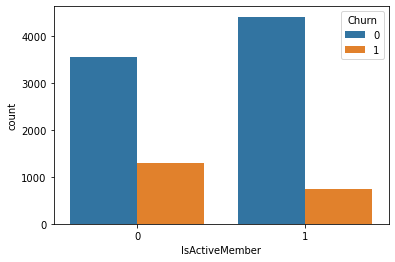

In [31]:
#Active Members

sns.countplot(x='IsActiveMember', hue='Churn', data=df)

This indicates that the churn count is higher for non-active members as compared to the active members of the bank. This is beacuse the active members are more satisfied with the services of the bank. So, the bank should focus more on the non-active members and try to improve their services to retain them.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

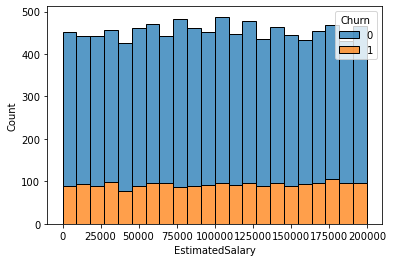

In [32]:
#Estimated Salary

sns.histplot(data=df, x='EstimatedSalary', hue='Churn', multiple='stack')

This indicates the distribution of the estimated salary of the customers alongwith their churn count. Here, we can't see any definite pattern so, estimated salary is not a good indicator of churn.

**Label encoding & Normalization**

In [33]:
#label encoding
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [34]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


**Co-orelation Matrix Heatmap**

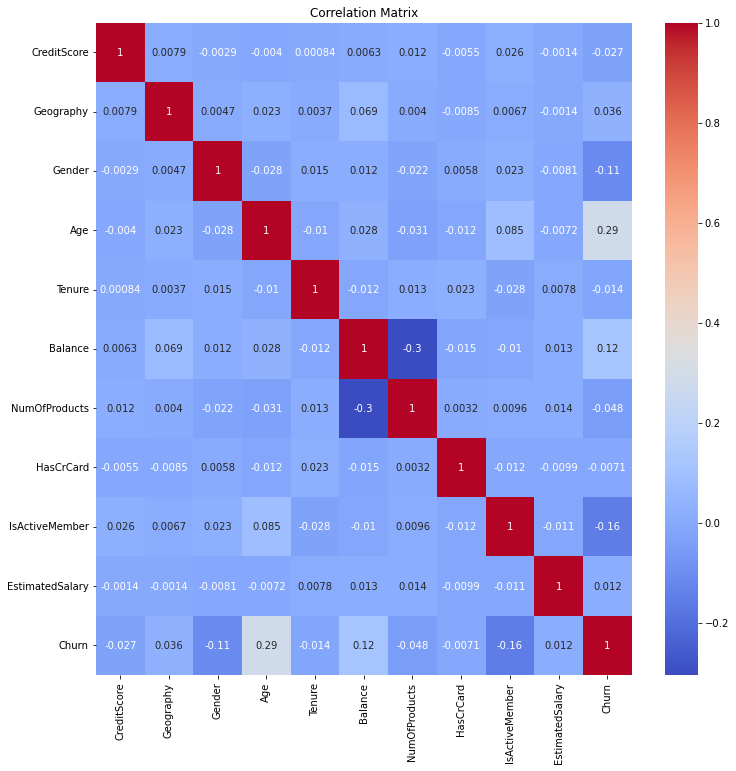

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
#no significant correlation

print(df.corr())

                 CreditScore  Geography    Gender       Age    Tenure  \
CreditScore         1.000000   0.007888 -0.002857 -0.003965  0.000842   
Geography           0.007888   1.000000  0.004719  0.022812  0.003739   
Gender             -0.002857   0.004719  1.000000 -0.027544  0.014733   
Age                -0.003965   0.022812 -0.027544  1.000000 -0.009997   
Tenure              0.000842   0.003739  0.014733 -0.009997  1.000000   
Balance             0.006268   0.069408  0.012087  0.028308 -0.012254   
NumOfProducts       0.012238   0.003972 -0.021859 -0.030680  0.013444   
HasCrCard          -0.005458  -0.008523  0.005766 -0.011721  0.022583   
IsActiveMember      0.025651   0.006724  0.022544  0.085472 -0.028362   
EstimatedSalary    -0.001384  -0.001369 -0.008112 -0.007201  0.007784   
Churn              -0.027094   0.035943 -0.106512  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CreditScore      0.006268       0.012238  -0.005458 

**Train Test Split**

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

**Decision Tree Classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}


In [40]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [41]:
#training the model

dtree.fit(X_train, y_train)

#training accuracy

dtree.score(X_train,y_train)

0.8581428571428571

In [42]:
dtree_pred = dtree.predict(X_test)

**Model Evalution**

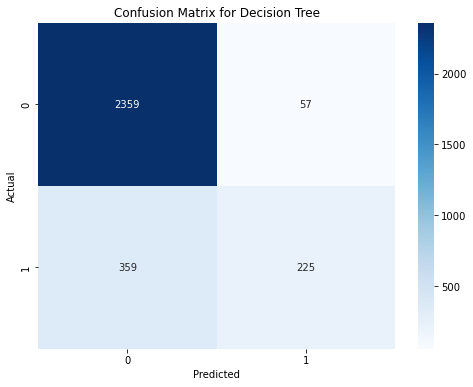

In [43]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

**Classification Report**

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [45]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

Accuracy Score:  0.8613333333333333
Mean Absolute Error:  0.13866666666666666
R2 Score:  0.11548580241313633


**Random Forest Classifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


In [47]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [48]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.8767142857142857

In [50]:
rfc_pred = rfc.predict(X_test)

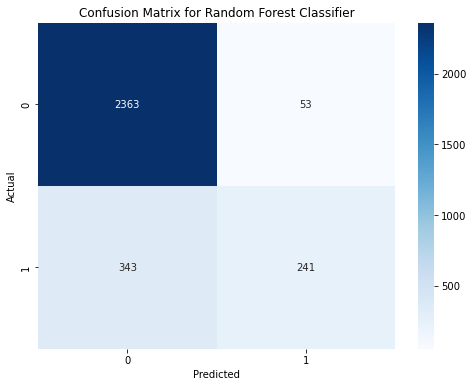

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [53]:
print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Accuracy Score:  0.868
Mean Absolute Error:  0.132
R2 Score:  0.15801052345096633


**Conclusion**

From the exploratory data analysis, I have concluded that the churn count of the customersdepends upon the following factors:

Age;
Geography;
Tenure;
Balance;
Number of Products;
Has Credit Card;
Is Active Member

Coming to the classification models, I have used the Decision Tree Classifier model & Random Forest Classifier model.
Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score. But, the Random Forest Classifier has a better accuracy and precision score than the Decision Tree Classifier.
